<a href="https://colab.research.google.com/github/it20667696/DeepLearning-SE4050-Project/blob/main/importent_file_(pp2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [35]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

# pip install graphviz
# conda install python-graphviz

In [36]:
pip install graphviz

In [8]:
# Define possible values for each column
pond_numbers = ['G1', 'G2', 'G3','G4','A1','A2','A3','A4']
breeds = ['01','02']
age_ranges = ['1', '2', '3']
fish_quantity = [50, 100, 150,200,250,300,350,400]
feed_types = ['00','01', '02']
feeding_intervals = ['2', '3']
feeding_quantity = [50,100, 150,200,250,300,350,400,450,500]
avg_temp_for_breed = {'01': 26.5,'02':27.5}

In [9]:
# Generate random historical data with specific pond numbers for each breed
num_records = 10000
data = pd.DataFrame({
    'Breed': random.choices(['01', '02'], k=num_records),
    'Age Range': random.choices(age_ranges, k=num_records),
    'Fish Quantity': random.choices(fish_quantity, k=num_records),
    'Feed Type': random.choices(feed_types, k=num_records),
    'Feeding Interval': random.choices(feeding_intervals, k=num_records),
    'Feeding Quantity': random.choices(feeding_quantity, k=num_records),
})

# Assign pond numbers based on the breed
data['Pond Number'] = data.apply(lambda row: f'G{random.choice([1, 2, 3, 4])}' if row['Breed'] == '01' else f'A{random.choice([1, 2, 3, 4])}', axis=1)

# Simulate real-time temperature monitoring
data['Real-Time Temperature'] = data.apply(lambda row: np.random.uniform(avg_temp_for_breed[row['Breed']] - 2, avg_temp_for_breed[row['Breed']] + 2), axis=1)

# Adjust feeding quantity based on real-time temperature
data['Adjusted Feeding Quantity'] =data.apply(lambda row: row['Feeding Quantity'] + 20 if row['Real-Time Temperature'] > avg_temp_for_breed[row['Breed']] else row['Feeding Quantity'] - 10, axis=1)

# Add average temperature for each breed to the DataFrame
data['Average Temperature for Breed'] = data['Breed'].map(avg_temp_for_breed)

In [10]:
# Save the dataset to a CSV file
data.to_csv('data.csv', index=False)

# Display the dataset
print(data.head())


  Breed Age Range  Fish Quantity Feed Type Feeding Interval  Feeding Quantity  \
0    02         3            150        02                2               100   
1    02         1            350        02                2               450   
2    02         2            300        02                2               500   
3    01         1            200        01                2               200   
4    01         3             50        01                3               450   

  Pond Number  Real-Time Temperature  Adjusted Feeding Quantity  \
0          A3              26.250402                         90   
1          A3              26.113227                        440   
2          A2              27.474218                        490   
3          G1              27.673189                        220   
4          G1              24.502765                        440   

   Average Temperature for Breed  
0                           27.5  
1                           27.5  
2    

In [33]:
# Load the dataset
his = pd.read_csv('data.csv')

In [34]:
print(data.shape)

# Display the dataset
print(data.head())

(10000, 10)
  Breed Age Range  Fish Quantity Feed Type Feeding Interval  Feeding Quantity  \
0    02         3            150        02                2               100   
1    02         1            350        02                2               450   
2    02         2            300        02                2               500   
3    01         1            200        01                2               200   
4    01         3             50        01                3               450   

  Pond Number  Real-Time Temperature  Adjusted Feeding Quantity  \
0          A3              26.250402                         90   
1          A3              26.113227                        440   
2          A2              27.474218                        490   
3          G1              27.673189                        220   
4          G1              24.502765                        440   

   Average Temperature for Breed  
0                           27.5  
1                           

In [37]:
# Investigate all the elements whithin each Feature

for column in data:
    unique_vals = np.unique(data[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Breed :2 -- ['01' '02']
The number of values for feature Age Range :3 -- ['1' '2' '3']
The number of values for feature Fish Quantity :8 -- [ 50 100 150 200 250 300 350 400]
The number of values for feature Feed Type :3 -- ['00' '01' '02']
The number of values for feature Feeding Interval :2 -- ['2' '3']
The number of values for feature Feeding Quantity :10 -- [ 50 100 150 200 250 300 350 400 450 500]
The number of values for feature Pond Number :8 -- ['A1' 'A2' 'A3' 'A4' 'G1' 'G2' 'G3' 'G4']
The number of values for feature Real-Time Temperature :10000
The number of values for feature Adjusted Feeding Quantity :20
The number of values for feature Average Temperature for Breed :2 -- [26.500000 27.500000]


In [39]:
# Checking for null values
data.isnull().sum()

Breed                            0
Age Range                        0
Fish Quantity                    0
Feed Type                        0
Feeding Interval                 0
Feeding Quantity                 0
Pond Number                      0
Real-Time Temperature            0
Adjusted Feeding Quantity        0
Average Temperature for Breed    0
dtype: int64

In [84]:
data.columns

Index(['Breed', 'Age Range', 'Fish Quantity', 'Feed Type', 'Feeding Interval',
       'Feeding Quantity', 'Pond Number', 'Real-Time Temperature',
       'Adjusted Feeding Quantity', 'Average Temperature for Breed'],
      dtype='object')

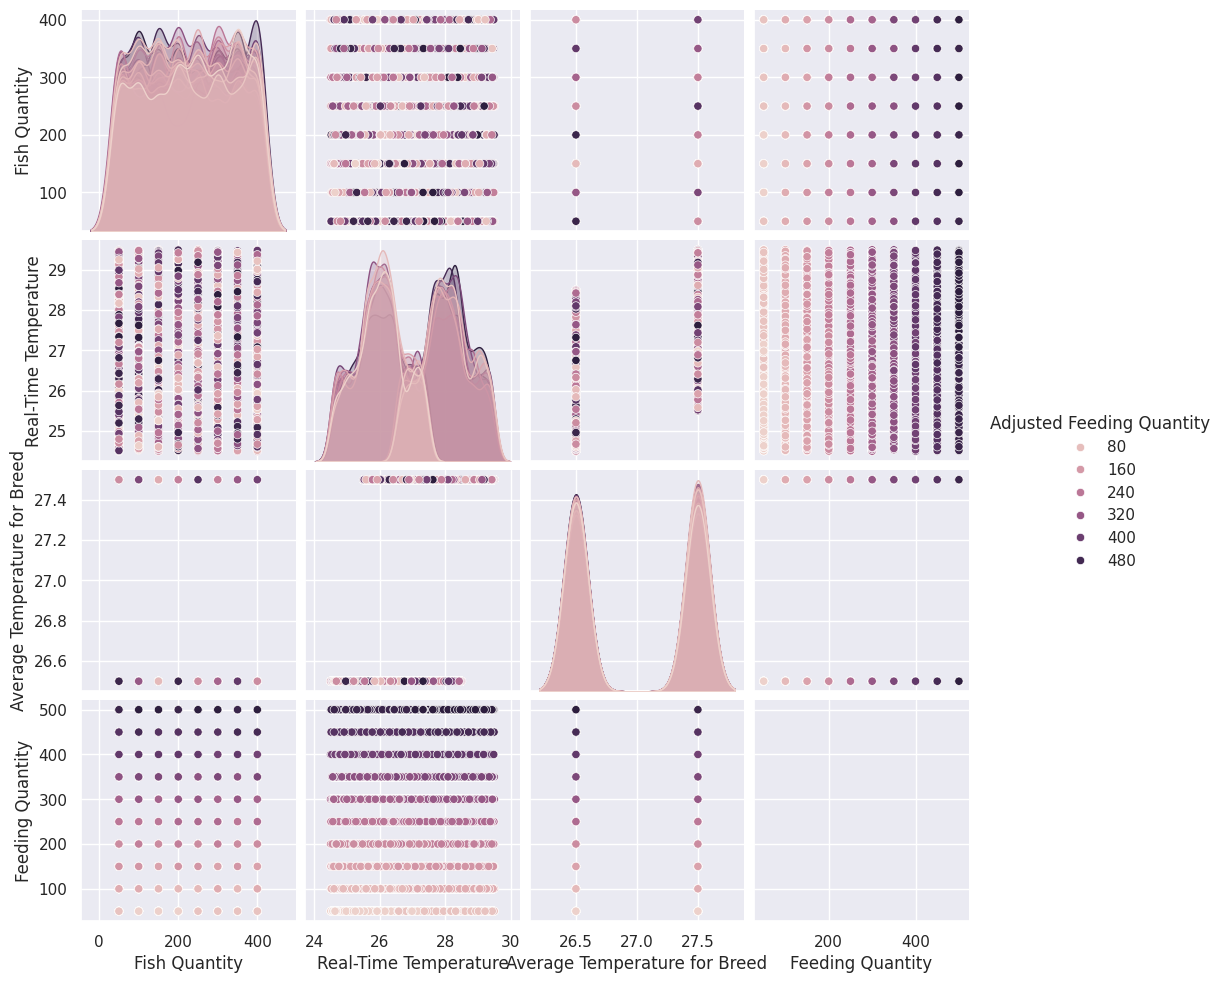

In [86]:
# Limiting the data
limited_data = data[['Breed', 'Age Range', 'Fish Quantity', 'Feed Type', 'Feeding Interval', 'Pond Number', 'Real-Time Temperature', 'Adjusted Feeding Quantity', 'Average Temperature for Breed','Feeding Quantity']]

# Visualize the data using seaborn Pairplots
g = sns.pairplot(limited_data, hue='Adjusted Feeding Quantity', diag_kws={'bw': 0.2})


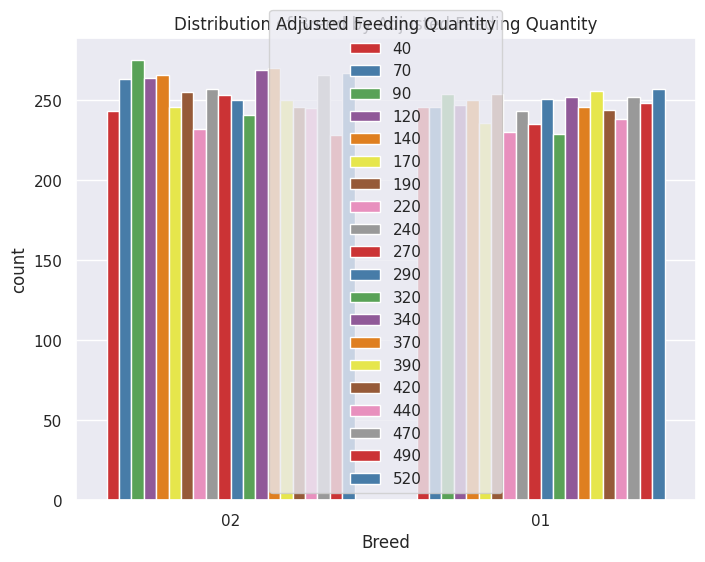

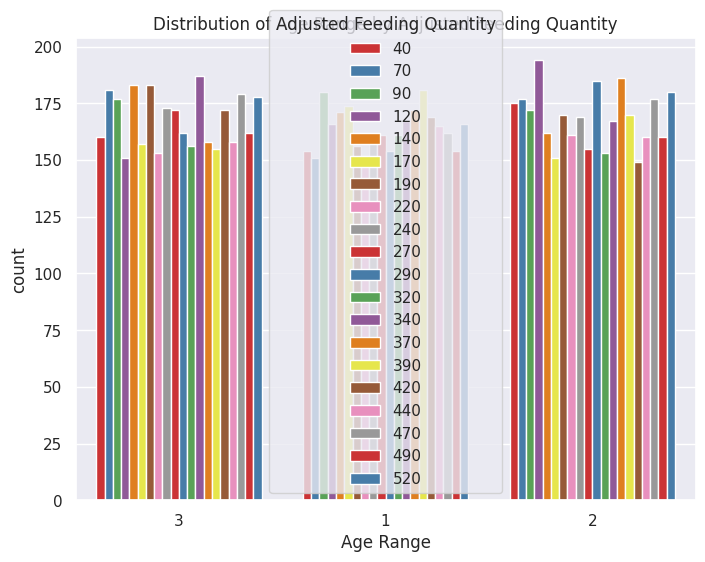

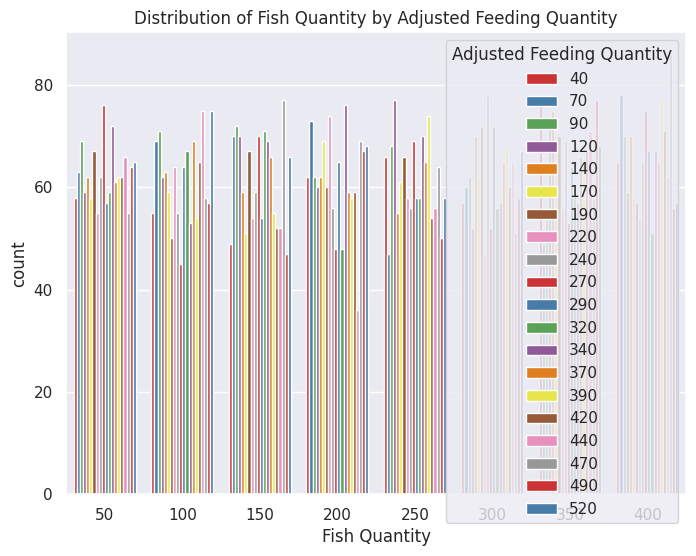

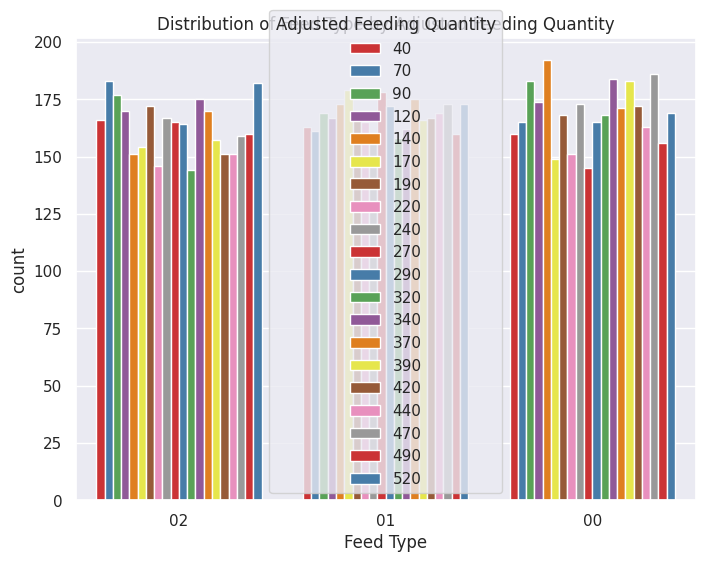

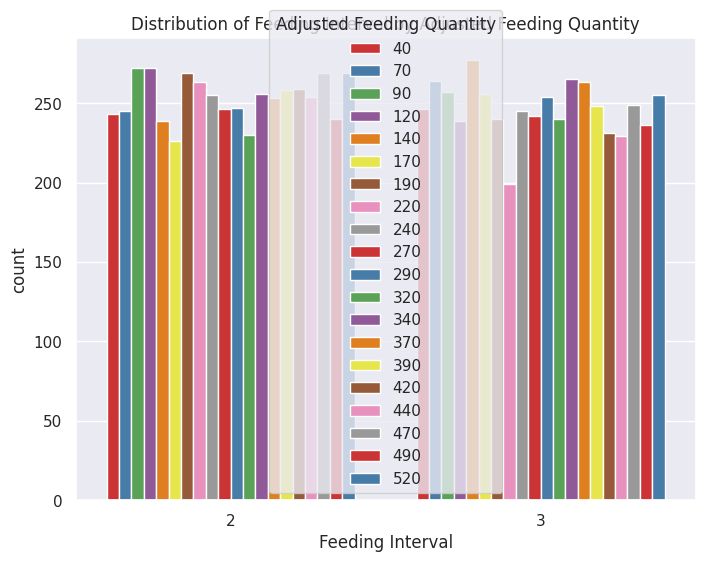

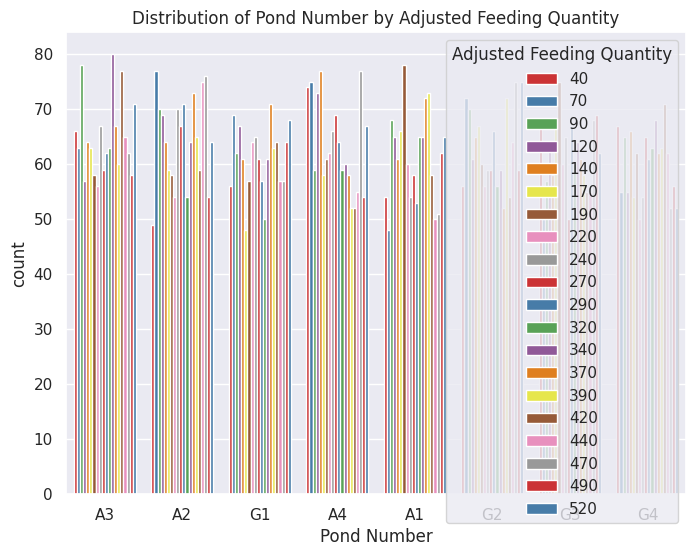

In [87]:
features = ['Breed', 'Age Range', 'Fish Quantity', 'Feed Type', 'Feeding Interval', 'Pond Number']

for feature in features:
    plt.figure()
    ax = sns.countplot(x=feature, data=limited_data, hue='Adjusted Feeding Quantity', palette='Set1')
    plt.title(f'Distribution of {feature} by Adjusted Feeding Quantity')
    plt.show()


In [88]:
limited_data.head()

,Breed,Age Range,Fish Quantity,Feed Type,Feeding Interval,Pond Number,Real-Time Temperature,Adjusted Feeding Quantity,Average Temperature for Breed,Feeding Quantity
0,02,3,150,02,2,A3,26.250402,90,27.5,100
1,02,1,350,02,2,A3,26.113227,440,27.5,450
2,02,2,300,02,2,A2,27.474218,490,27.5,500
3,01,1,200,01,2,G1,27.673189,220,26.5,200
4,01,3,50,01,3,G1,24.502765,440,26.5,450


In [89]:
# Making categorical variables into numeric representation
new_data = pd.get_dummies(limited_data, columns=['Breed', 'Age Range', 'Feed Type', 'Feeding Interval', 'Pond Number','Feeding Quantity'])

new_data.head()


,Fish Quantity,Real-Time Temperature,Adjusted Feeding Quantity,Average Temperature for Breed,Breed_01,Breed_02,Age Range_1,Age Range_2,Age Range_3,Feed Type_00,...,Feeding Quantity_50,Feeding Quantity_100,Feeding Quantity_150,Feeding Quantity_200,Feeding Quantity_250,Feeding Quantity_300,Feeding Quantity_350,Feeding Quantity_400,Feeding Quantity_450,Feeding Quantity_500
0,150,26.250402,90,27.5,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,350,26.113227,440,27.5,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,300,27.474218,490,27.5,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,200,27.673189,220,26.5,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,50,24.502765,440,26.5,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [94]:
print(new_data.columns)

Index(['Fish Quantity', 'Real-Time Temperature', 'Adjusted Feeding Quantity',
       'Average Temperature for Breed', 'Breed_01', 'Breed_02', 'Age Range_1',
       'Age Range_2', 'Age Range_3', 'Feed Type_00', 'Feed Type_01',
       'Feed Type_02', 'Feeding Interval_2', 'Feeding Interval_3',
       'Pond Number_A1', 'Pond Number_A2', 'Pond Number_A3', 'Pond Number_A4',
       'Pond Number_G1', 'Pond Number_G2', 'Pond Number_G3', 'Pond Number_G4',
       'Feeding Quantity_50', 'Feeding Quantity_100', 'Feeding Quantity_150',
       'Feeding Quantity_200', 'Feeding Quantity_250', 'Feeding Quantity_300',
       'Feeding Quantity_350', 'Feeding Quantity_400', 'Feeding Quantity_450',
       'Feeding Quantity_500'],
      dtype='object')


In [106]:
from sklearn.preprocessing import MinMaxScaler

# Scaling our columns
scale_vars = ['Fish Quantity', 'Real-Time Temperature']

scaler = MinMaxScaler()
new_data[scale_vars] = scaler.fit_transform(new_data[scale_vars])

new_data.head()






,Fish Quantity,Real-Time Temperature,Adjusted Feeding Quantity,Average Temperature for Breed,Breed_01,Breed_02,Age Range_1,Age Range_2,Age Range_3,Feed Type_00,...,Feeding Quantity_50,Feeding Quantity_100,Feeding Quantity_150,Feeding Quantity_200,Feeding Quantity_250,Feeding Quantity_300,Feeding Quantity_350,Feeding Quantity_400,Feeding Quantity_450,Feeding Quantity_500
0,0.285714,0.350116,0.104167,27.5,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0.857143,0.322673,0.833333,27.5,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.714286,0.594947,0.937500,27.5,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.428571,0.634752,0.375000,26.5,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.000000,0.000491,0.833333,26.5,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [107]:
print(new_data.columns)



Index(['Fish Quantity', 'Real-Time Temperature', 'Adjusted Feeding Quantity',
       'Average Temperature for Breed', 'Breed_01', 'Breed_02', 'Age Range_1',
       'Age Range_2', 'Age Range_3', 'Feed Type_00', 'Feed Type_01',
       'Feed Type_02', 'Feeding Interval_2', 'Feeding Interval_3',
       'Pond Number_A1', 'Pond Number_A2', 'Pond Number_A3', 'Pond Number_A4',
       'Pond Number_G1', 'Pond Number_G2', 'Pond Number_G3', 'Pond Number_G4',
       'Feeding Quantity_50', 'Feeding Quantity_100', 'Feeding Quantity_150',
       'Feeding Quantity_200', 'Feeding Quantity_250', 'Feeding Quantity_300',
       'Feeding Quantity_350', 'Feeding Quantity_400', 'Feeding Quantity_450',
       'Feeding Quantity_500'],
      dtype='object')


In [113]:
# Your code goes here
X = new_data.drop('Adjusted Feeding Quantity', axis=1).values  # Input features (attributes)
y = new_data['Adjusted Feeding Quantity'].values  # Target vector

print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=0)



X shape: (10000, 31)
y shape: (10000,)


In [112]:
from sklearn.preprocessing import LabelEncoder

# Use label encoding for multiple classes
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


# Doc:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeC

In [114]:
# Assuming 'Exited' is continuous, convert it to binary
new_data['Adjusted Feeding Quantity'] = new_data['Adjusted Feeding Quantity'].apply(lambda x: 1 if x > 0.5 else 0)


In [115]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [116]:
# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Example metrics - you can adjust based on your problem
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))



Accuracy: 0.715

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.41      0.58       479
           1       0.65      1.00      0.79       521

    accuracy                           0.71      1000
   macro avg       0.82      0.70      0.68      1000
weighted avg       0.82      0.71      0.69      1000


Confusion Matrix:
 [[194 285]
 [  0 521]]


In [121]:
import graphviz

dot_data = tree.export_graphviz(dt, out_file=None,
    feature_names=new_data.drop('Adjusted Feeding Quantity', axis=1).columns,
    class_names=new_data['Adjusted Feeding Quantity'].unique().astype(str),
    filled=True, rounded=True,
    special_characters=True)
graph = graphviz.Source(dot_data)
graph
graph.render("decision_tree")  # Save the tree to a file (e.g., decision_tree.pdf)
graph.view("decision_tree")   # Open the tree visualization


'decision_tree.pdf'

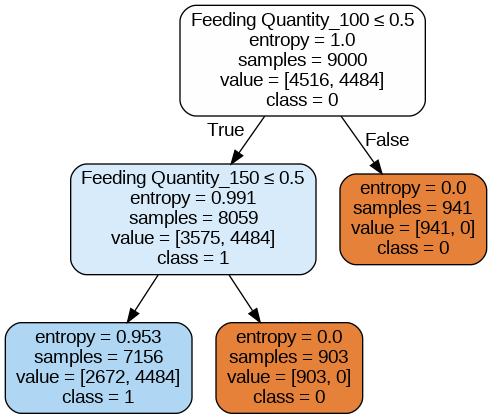

In [123]:
graph.render("decision_tree", format="png", cleanup=True)
Image("decision_tree.png")



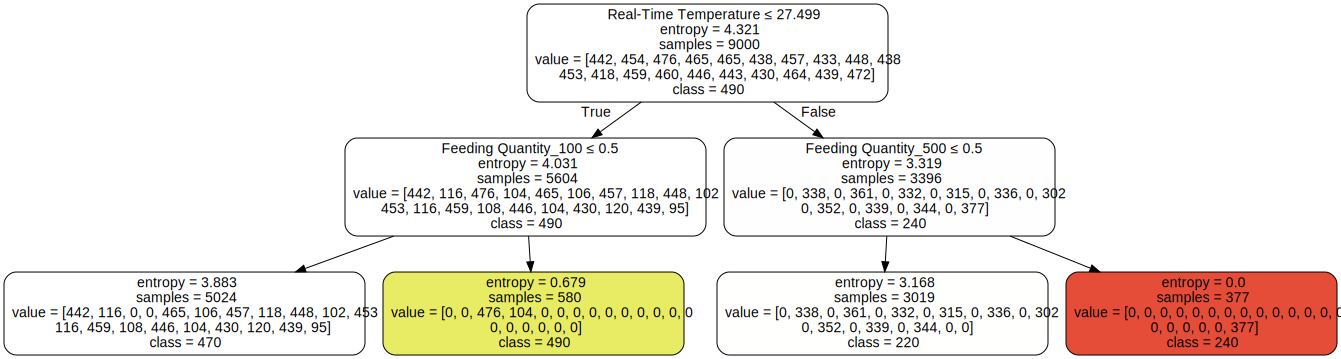

In [50]:
import graphviz

dot_data = tree.export_graphviz(dt, out_file=None,
    feature_names=new_raw_data.drop('Adjusted Feeding Quantity', axis=1).columns,
    class_names=new_raw_data['Exited'].unique().astype(str),
    filled=True, rounded=True,
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [124]:
#del final_fi

# Calculating FI
for i, column in enumerate(new_data.drop('Adjusted Feeding Quantity', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi


# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()
final_fi

Importance of feature Fish Quantity:, 0.000
Importance of feature Real-Time Temperature:, 0.000
Importance of feature Average Temperature for Breed:, 0.000
Importance of feature Breed_01:, 0.000
Importance of feature Breed_02:, 0.000
Importance of feature Age Range_1:, 0.000
Importance of feature Age Range_2:, 0.000
Importance of feature Age Range_3:, 0.000
Importance of feature Feed Type_00:, 0.000
Importance of feature Feed Type_01:, 0.000
Importance of feature Feed Type_02:, 0.000
Importance of feature Feeding Interval_2:, 0.000
Importance of feature Feeding Interval_3:, 0.000
Importance of feature Pond Number_A1:, 0.000
Importance of feature Pond Number_A2:, 0.000
Importance of feature Pond Number_A3:, 0.000
Importance of feature Pond Number_A4:, 0.000
Importance of feature Pond Number_G1:, 0.000
Importance of feature Pond Number_G2:, 0.000
Importance of feature Pond Number_G3:, 0.000
Importance of feature Pond Number_G4:, 0.000
Importance of feature Feeding Quantity_50:, 0.000
Imp

,level_0,index,Variable,Feature Importance Score
0,62,NaN,Feeding Quantity_150,0.534072
1,0,0.0,Real-Time Temperature,0.533384
2,61,NaN,Feeding Quantity_100,0.465928
3,1,30.0,Feeding Quantity_100,0.285391
4,2,38.0,Feeding Quantity_500,0.181225
...,...,...,...,...
65,29,10.0,Feeding Interval_3,0.000000
66,30,12.0,Pond Number_A2,0.000000
67,31,1.0,Breed_01,0.000000
68,32,13.0,Pond Number_A3,0.000000


In [125]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.7031111111111111
Testing Accuracy is:  0.715


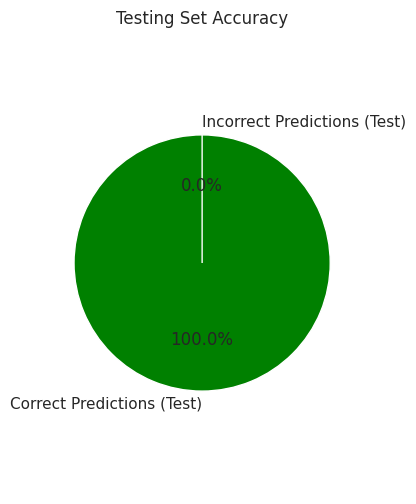

In [149]:
# Calculate accuracy on training and testing sets
accuracy_train = accuracy_score(y_train, y_train)
accuracy_test = accuracy_score(y_test, y_test)

# # Create a pie chart for training set accuracy
# labels_train = ['Correct Predictions (Train)', 'Incorrect Predictions (Train)']
# sizes_train = [accuracy_train, 1 - accuracy_train]
# colors_train = ['green', 'red']

# plt.subplot(1, 2, 1)
# plt.pie(sizes_train, labels=labels_train, autopct='%1.1f%%', colors=colors_train, startangle=90)
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('Training Set Accuracy')

# Create a pie chart for testing set accuracy
labels_test = ['Correct Predictions (Test)', 'Incorrect Predictions (Test)']
sizes_test = [accuracy_test, 1 - accuracy_test]
colors_test = ['green', 'red']

plt.subplot(1, 2, 2)
plt.pie(sizes_test, labels=labels_test, autopct='%1.1f%%', colors=colors_test, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Testing Set Accuracy')

# Display the charts
plt.show()


In [126]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

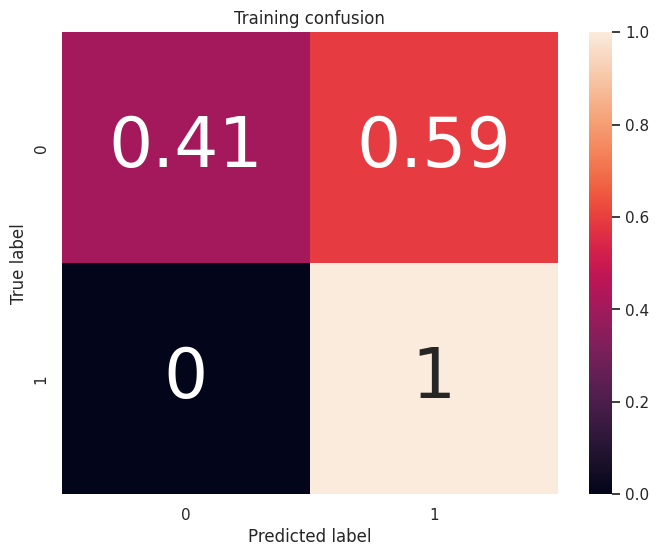

In [127]:
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

In [128]:
y_pred = dt.predict(X_train)
y_pred
confusion_matrix(y_train, y_pred)

array([[1844, 2672],
       [   0, 4484]])

In [129]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)

# Explenations:https://youtu.be/0HDy6n3UD5M

The True Positive rate / Recall per class is:  [0.408326 1.000000]
The Precision per class is:  [1.000000 0.626607]
The False Alarm rate per class is:  [0.000000 0.591674]
The Miss Rate rate per class is:  [0.591674 0.000000]
The Classification error of each class is [0.296889 0.296889]
The Accuracy of each class is [0.703111 0.703111]

The average Recall is:  0.704162976085031
The average Precision is:  0.8133035215204025
The average False Alarm is:  0.295837023914969
The average Miss Rate rate is:  0.295837023914969
The average Classification error is 0.29688888888888887
The average Accuracy is 0.7031111111111111


RANDOM FOREST

Training Accuracy is:  1.0
Testing Accuracy is:  1.0


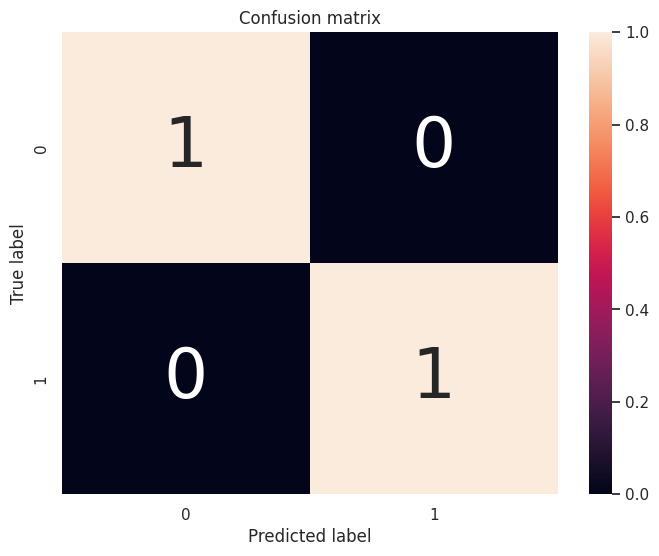

In [130]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Classification accuracy on test set with max features = 1 and max_depth = None: 1.000
Classification accuracy on test set with max features = 1 and max_depth = 2: 1.000
Classification accuracy on test set with max features = 1 and max_depth = 3: 1.000
Classification accuracy on test set with max features = 1 and max_depth = 4: 1.000
Classification accuracy on test set with max features = 1 and max_depth = 5: 1.000
Classification accuracy on test set with max features = sqrt and max_depth = None: 1.000
Classification accuracy on test set with max features = sqrt and max_depth = 2: 1.000
Classification accuracy on test set with max features = sqrt and max_depth = 3: 1.000
Classification accuracy on test set with max features = sqrt and max_depth = 4: 1.000
Classification accuracy on test set with max features = sqrt and max_depth = 5: 1.000
Classification accuracy on test set with max features = log2 and max_depth = None: 1.000
Classification accuracy on test set with max features = log2

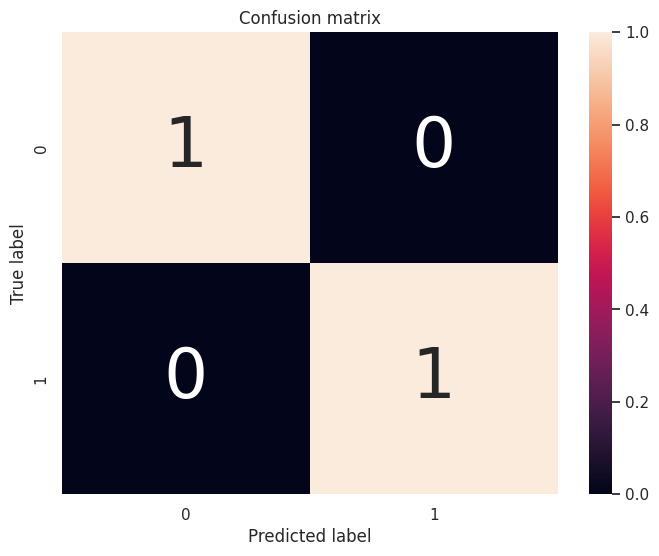

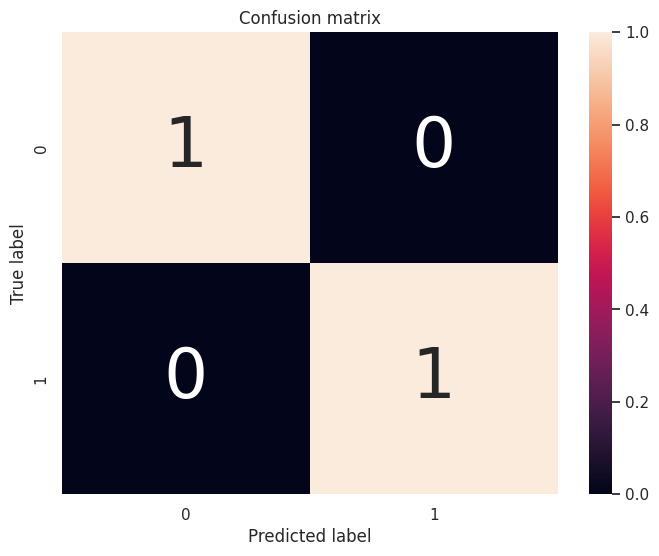

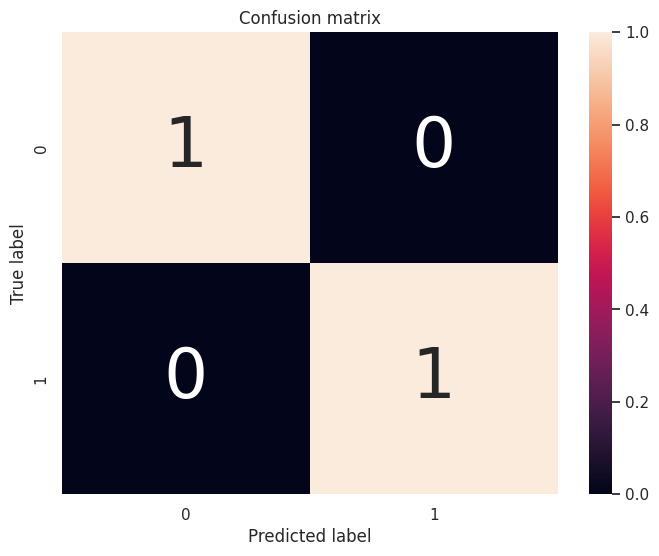

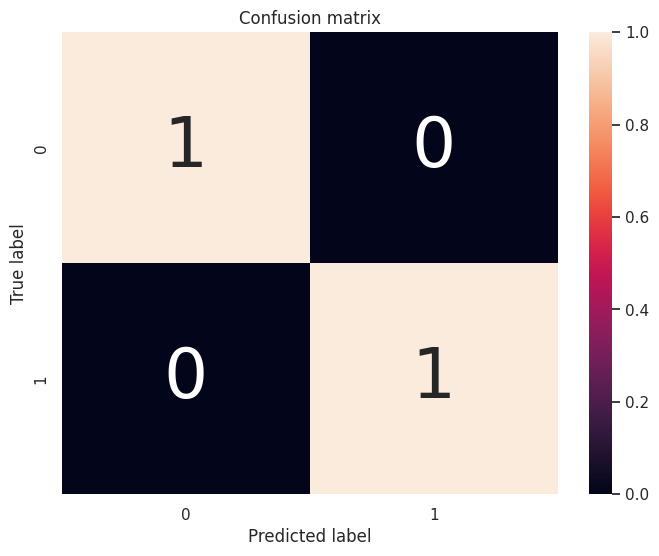

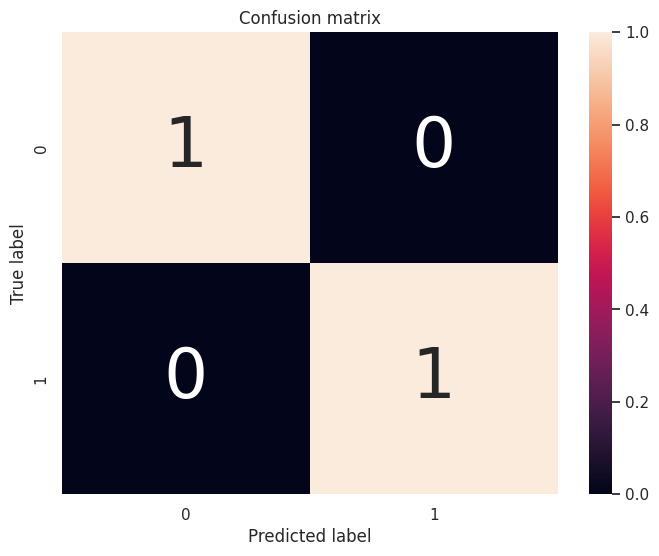

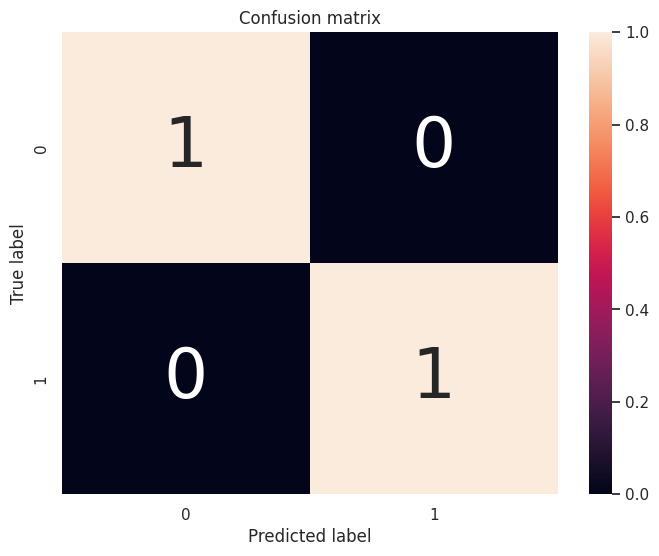

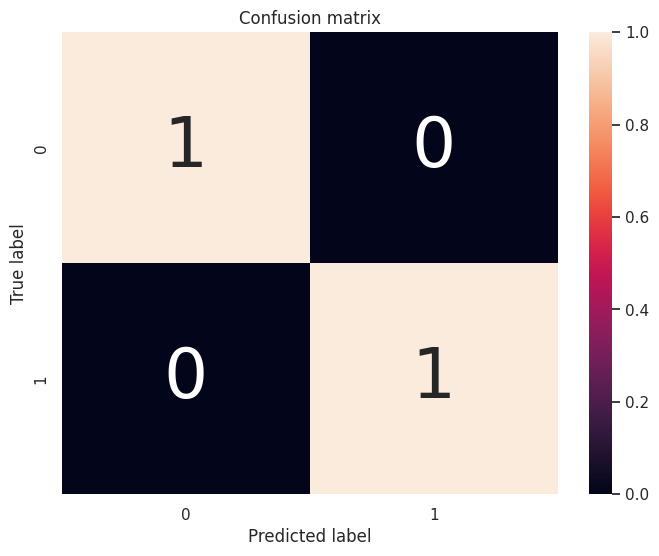

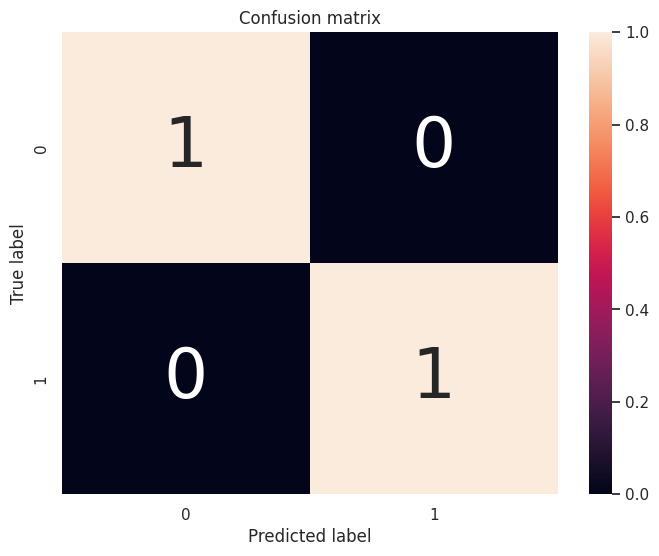

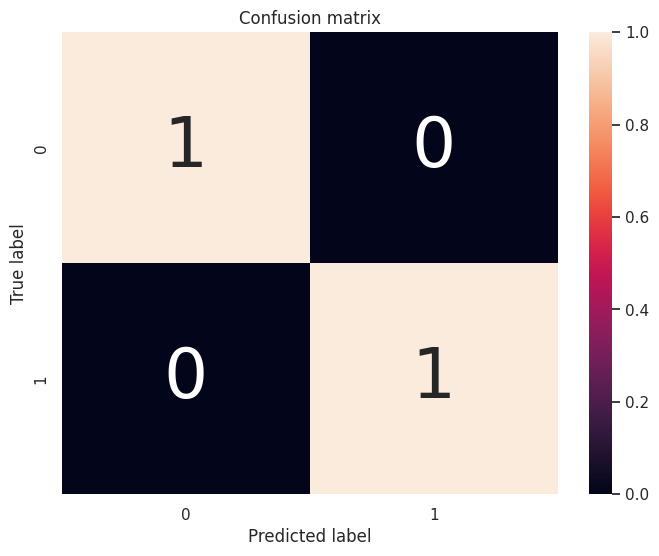

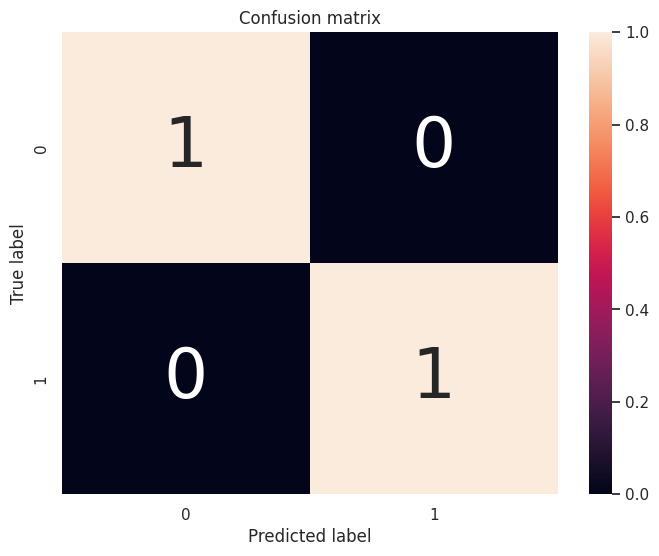

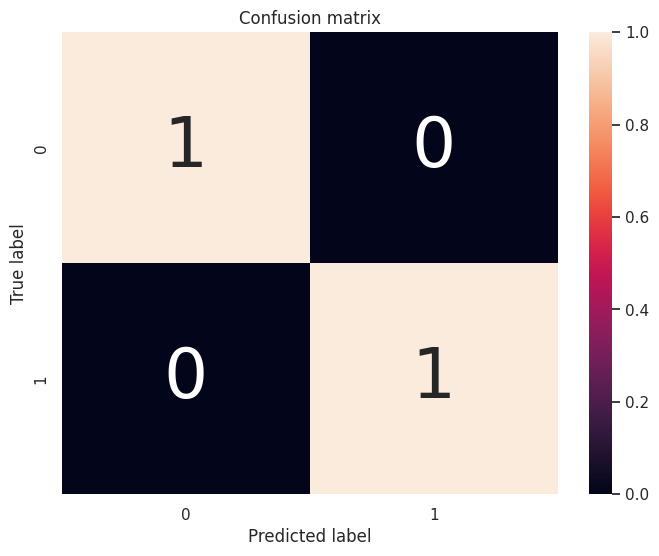

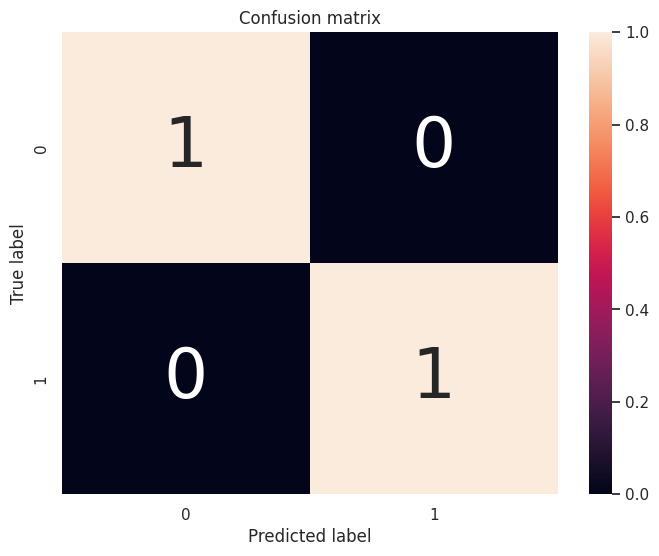

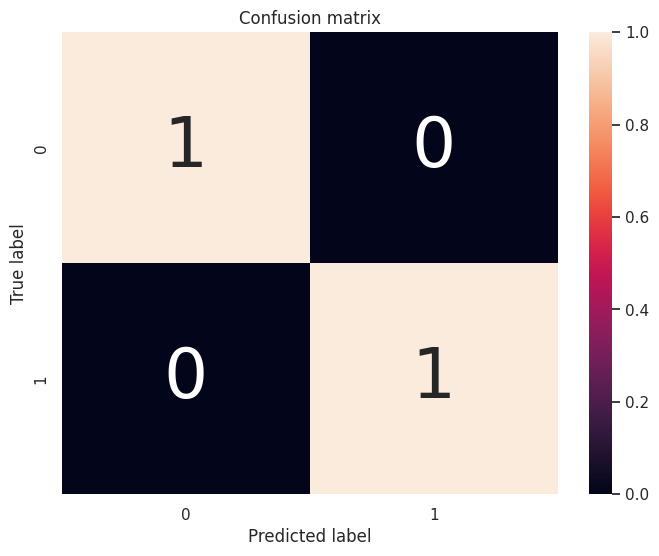

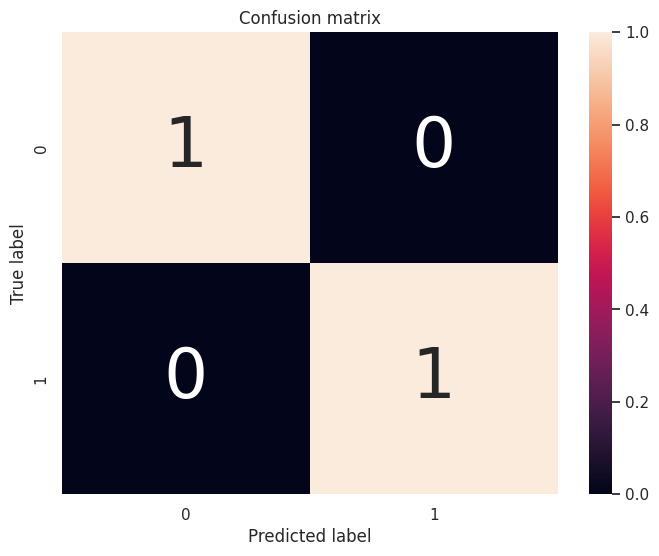

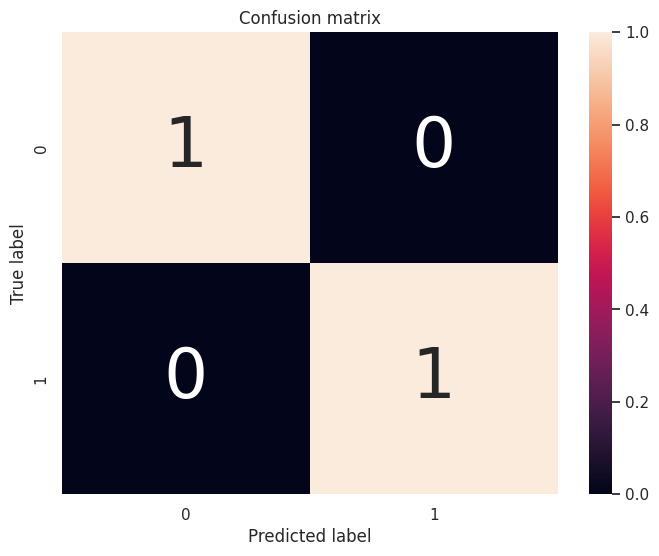

In [131]:
# Tunning Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators,
                                criterion='entropy',
                                max_features=f,
                                max_depth=d,
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_)


In [132]:
import joblib

# Save the model to a file
joblib.dump(dt, 'decision_tree_model.joblib')

# Load the model from the file
loaded_model = joblib.load('decision_tree_model.joblib')


In [140]:
import pandas as pd
import joblib

def predict_adjusted_feeding_quantity(user_inputs):
    # Load the model from the file
    loaded_model = joblib.load('decision_tree_model.joblib')

    # Convert user inputs to DataFrame
    user_data = pd.DataFrame([user_inputs])

    # Perform any necessary preprocessing (e.g., one-hot encoding)
    # Example: Assuming 'Pond Number' is a categorical variable
    user_data_encoded = pd.get_dummies(user_data, columns=['Pond Number'])

    # Example: Replace 'training_columns' with the actual columns from your training data
    training_columns = ['Fish Quantity', 'Real-Time Temperature', 'Average Temperature for Breed', 'Breed_01', 'Breed_02', 'Age Range_1',
        'Age Range_2', 'Age Range_3', 'Feed Type_00', 'Feed Type_01',
        'Feed Type_02', 'Feeding Interval_2', 'Feeding Interval_3',
        'Pond Number_A1', 'Pond Number_A2', 'Pond Number_A3', 'Pond Number_A4',
        'Pond Number_G1', 'Pond Number_G2', 'Pond Number_G3', 'Pond Number_G4',
        'Feeding Quantity_50', 'Feeding Quantity_100', 'Feeding Quantity_150',
        'Feeding Quantity_200', 'Feeding Quantity_250', 'Feeding Quantity_300',
        'Feeding Quantity_350', 'Feeding Quantity_400', 'Feeding Quantity_450',
        'Feeding Quantity_500']

    # Ensure the order of columns matches the model's expectations
    user_data_encoded = user_data_encoded.reindex(columns=training_columns, fill_value=0)

    # Make predictions
    predictions = loaded_model.predict(user_data_encoded.values)

    # Return the predicted Adjusted Feeding Quantity
    return predictions[0]

# # Example of using the function with user inputs
# user_inputs = {
#     'Breed': '01',
#     'Age Range': '2',
#     'Fish Quantity': 150,
#     'Feed Type': '01',
#     'Feeding Interval': '2',
#     'Feeding Quantity': 200,
#     'Pond Number': 'A2',
#     'Real-Time Temperature': 38.0,
#     'Average Temperature for Breed': 26.5
# }

# result = predict_adjusted_feeding_quantity(user_inputs)
# print(result)


In [141]:
import pandas as pd
import joblib

def predict_adjusted_feeding_quantity(user_inputs):
    # Load the model from the file
    loaded_model = joblib.load('decision_tree_model.joblib')

    # Convert user inputs to DataFrame
    user_data = pd.DataFrame([user_inputs])

    # Perform any necessary preprocessing (e.g., one-hot encoding)
    # Example: Assuming 'Pond Number' is a categorical variable
    user_data_encoded = pd.get_dummies(user_data, columns=['Pond Number'])

    # Example: Replace 'training_columns' with the actual columns from your training data
    training_columns = ['Fish Quantity', 'Real-Time Temperature', 'Average Temperature for Breed', 'Breed_01', 'Breed_02', 'Age Range_1',
        'Age Range_2', 'Age Range_3', 'Feed Type_00', 'Feed Type_01',
        'Feed Type_02', 'Feeding Interval_2', 'Feeding Interval_3',
        'Pond Number_A1', 'Pond Number_A2', 'Pond Number_A3', 'Pond Number_A4',
        'Pond Number_G1', 'Pond Number_G2', 'Pond Number_G3', 'Pond Number_G4',
        'Feeding Quantity_50', 'Feeding Quantity_100', 'Feeding Quantity_150',
        'Feeding Quantity_200', 'Feeding Quantity_250', 'Feeding Quantity_300',
        'Feeding Quantity_350', 'Feeding Quantity_400', 'Feeding Quantity_450',
        'Feeding Quantity_500']

    # Ensure the order of columns matches the model's expectations
    user_data_encoded = user_data_encoded.reindex(columns=training_columns, fill_value=0)

    # Make predictions
    predictions = loaded_model.predict(user_data_encoded.values)

    # Return the predicted Adjusted Feeding Quantity
    return predictions[0]

# Take user inputs through text prompts
user_inputs = {
    'Breed': input('Enter Breed (e.g., 01): '),
    'Age Range': input('Enter Age Range (e.g., 2): '),
    'Fish Quantity': float(input('Enter Fish Quantity: ')),
    'Feed Type': input('Enter Feed Type (e.g., 01): '),
    'Feeding Interval': input('Enter Feeding Interval (e.g., 3): '),
    'Feeding Quantity': float(input('Enter Feeding Quantity: ')),
    'Pond Number': input('Enter Pond Number (e.g., A2): '),
    'Real-Time Temperature': float(input('Enter Real-Time Temperature: ')),
    'Average Temperature for Breed': float(input('Enter Average Temperature for Breed: '))
}

result = predict_adjusted_feeding_quantity(user_inputs)
print('Predicted Adjusted Feeding Quantity:', result)


Enter Breed (e.g., 01): 02
Enter Age Range (e.g., 2): 3
Enter Fish Quantity: 50
Enter Feed Type (e.g., 01): 00
Enter Feeding Interval (e.g., 3): 2
Enter Feeding Quantity: 200
Enter Pond Number (e.g., A2): A3
Enter Real-Time Temperature: 38.5
Enter Average Temperature for Breed: 27.5
Predicted Adjusted Feeding Quantity: 1


In [142]:
import joblib

# Save the model to a file
joblib.dump(dt, 'decision_tree_model1.joblib')

# Load the model from the file
loaded_model = joblib.load('decision_tree_model1.joblib')

In [143]:
import pandas as pd
import joblib

def load_model():
    # Load the model from the file
    loaded_model = joblib.load('decision_tree_model1.joblib')
    return loaded_model

def predict_adjusted_feeding_quantity(loaded_model, user_inputs):
    # Convert user inputs to DataFrame
    user_data = pd.DataFrame([user_inputs])

    # Perform any necessary preprocessing (e.g., one-hot encoding)
    # Example: Assuming 'Pond Number' is a categorical variable
    user_data_encoded = pd.get_dummies(user_data, columns=['Pond Number'])

    # ... (previous code)

    # Ensure the order of columns matches the model's expectations
    # Example: Replace 'training_columns' with the actual columns from your training data
    training_columns = ['Fish Quantity', 'Real-Time Temperature', 'Average Temperature for Breed', 'Breed_01', 'Breed_02', 'Age Range_1',
       'Age Range_2', 'Age Range_3', 'Feed Type_00', 'Feed Type_01',
       'Feed Type_02', 'Feeding Interval_2', 'Feeding Interval_3',
       'Pond Number_A1', 'Pond Number_A2', 'Pond Number_A3', 'Pond Number_A4',
       'Pond Number_G1', 'Pond Number_G2', 'Pond Number_G3', 'Pond Number_G4',
       'Feeding Quantity_50', 'Feeding Quantity_100', 'Feeding Quantity_150',
       'Feeding Quantity_200', 'Feeding Quantity_250', 'Feeding Quantity_300',
       'Feeding Quantity_350', 'Feeding Quantity_400', 'Feeding Quantity_450',
       'Feeding Quantity_500']

    user_data_encoded = user_data_encoded.reindex(columns=training_columns, fill_value=0)

    # Make predictions
    predictions = loaded_model.predict(user_data_encoded.values)

    # Return the predicted Adjusted Feeding Quantity
    return predictions[0]

def main():
    # Load the model
    loaded_model = load_model()

    # Get user inputs interactively
    user_inputs = {
        'Breed': input('Enter Breed: '),  # Example: '01'
        'Age Range': input('Enter Age Range: '),  # Example: '2'
        'Fish Quantity': float(input('Enter Fish Quantity: ')),  # Example: 150
        'Feed Type': input('Enter Feed Type: '),  # Example: '01'
        'Feeding Interval': input('Enter Feeding Interval: '),  # Example: '3'
        'Feeding Quantity': float(input('Enter Feeding Quantity: ')),  # Example: 200
        'Pond Number': input('Enter Pond Number: '),  # Example: 'A2'
        'Real-Time Temperature': float(input('Enter Real-Time Temperature: ')),  # Example: 28.0
        'Average Temperature for Breed': float(input('Enter Average Temperature for Breed: ')),  # Example: 26.5
    }

    # Make predictions
    result = predict_adjusted_feeding_quantity(loaded_model, user_inputs)
    print(f'Predicted Adjusted Feeding Quantity: {result}')

if __name__ == "__main__":
    main()


Enter Breed: 1
Enter Age Range: 1
Enter Fish Quantity: 250
Enter Feed Type: 01
Enter Feeding Interval: 2
Enter Feeding Quantity: 50
Enter Pond Number: A1
Enter Real-Time Temperature: 20
Enter Average Temperature for Breed: 26.5
Predicted Adjusted Feeding Quantity: 1
